# Week 3 Overview
This week, we explore two methods for estimating causal effects: event studies and differences-in-differences. In event studies, we analyze how changes in a variable, such as a stock price, can be attributed to a specific event by modeling counterfactuals and using regression. In differences-in-differences, we compare changes over time between a treatment group and a control group to estimate the impact of a treatment, assuming the parallel trends assumption holds. Both methods help us understand whether observed changes are due to an event or treatment and allow us to isolate their effects more accurately.

## Learning Objectives
At the end of this week, you will be able to: 
- Implement a simple event study 
- Perform differences-in-differences

## Topic Overview: Event Studies
In this topic, we look at how event studies are used to determine whether changes in a variable — like a stock price — can be attributed to a specific event or are simply due to random variation. By modeling counterfactuals and using linear regression, we can estimate whether observed jumps in level or trend are statistically significant and likely caused by the event.

### Learning Objectives
- Perform a simple event study

## 1.1 Lesson: Event Studies and the Stock Market
When a big event happens — like a major policy announcement, or a large company going bankrupt, for example — it might cause a sudden shift in data. But how can we tell if the event caused that shift or if it was just random noise? In this video, you'll learn how event studies help us identify whether changes in data are meaningful or just coincidences. We'll explore visual examples, discuss the role of noise, and introduce simple statistical tools to help detect real effects.

Recall from the video: 

> An **event study** tries to determine whether a change in a variable, after an event, is due to the event itself or is due to some noise. 

- Certain **confounders** can be detected as well, such as the market return in stock market analyses. 
- To achieve this, we have to consider a counterfactual: What would have happened if the event had not taken place? 

For example: 
- Suppose a stock price is following an upward trend then the corporation makes an announcement about a merger, a scandal, a technological invention, or other news. 
- At that point, the stock suddenly leaps up, suddenly drops down, or starts to follow a different trend (perhaps a steeper upward slope, a shallower upward slope, or a downward slope). 

The question we want to answer is: 
- Is this stock change is due to the announcement? or is due to random noise. 
    - If the leap or change in the slope is large, it likely means that the change is due to the announcement. 
    - If it is small, it might be caused by noise. But how large does it have to be before we can attribute it to a specific event? Linear regression can tell us that. 
- To do this, we’ll need to assume that the upward trend would have continued as observed, if not for the announcement. 
- Alternatively, we could relate the stock prices to the values of other stocks. 
    - Maybe it wasn’t on a permanent upward trend, but rather it was going up because some other stocks were going up. 
    - In this case, the counterfactual shouldn’t assume that our stock of interest will go up at the same rate as before but rather that it would imitate these other stocks. 
    - If it fails to imitate the other stocks, then this change is due to the announcement event. 
    - In fact, it could even be that other stocks leap downward, while this stock stays put — if so, “staying put” could itself be due to the announcement. 

Let’s go with the former idea: We’ll just look at the upward trend and assume it would have continued as observed if not for the announcement. We can then perform a linear regression like: 

$$ \text{Outcome} \; = \; \beta_0 + \beta_1t + \beta_2\text{After} + \beta_3 (t-t_0) \times \text{After} + \epsilon $$

- Here, "$\text{After}$" is $0$ before the event, and $1$ after the event
- $t$ is a number that represents the time.
- $t_0$ is the time of the event. 
- $(t-t_0) \times \text{After}$ is $t - t_0$ after the event and $0$ before. 

This says that there is one slope before the event, and another slope after. 
- The slope before is $\beta_1$, and the slope after is $\beta_1 + \beta_3$.
- There is also a "jump" of $\beta_2$ at the event. 

We are interested in both effects:
- $\beta_2$ (the jump in value of the stock)
- $\beta_3$ the jump in slope of the trend which is $(\beta_1 + \beta_3) - \beta_1$

One issue with this is that it is highly unlikely that the stock would follow a linear trend for a long period of time. In fact, under the *efficient market hypothesis*, it is unlikely that a single event would continue to cause predictable changes to a stock’s price because any predictable results due to the event are quickly “priced in” by investors.

Moreover, there is no reason for a stock to follow a linear trend at all. At each moment, we are mostly unsure as to which direction the stock will go next. (If we could be sure that it would follow a particular trend, we’d buy it before it goes up!) However, it is possible that we could have some probabilistic knowledge as to how the stock will move. 

The **Event Study** then, helps us to decide whether the leaps $\beta_2$ (in value) and $\beta_3$ (in slope) are due to the event, as well as estimating those leaps.

### Required Resources
The following resources are required for your learning this week. Make sure you review everything linked below, as you may be tested on the concepts in an upcoming Knowledge Check or homework. 

#### Reading | Huntington-Klein, N. (2022, January 5). The effect: An introduction to research design and causality.

Read the following chapters: 
- Chapter 6: Causal Diagrams 
- Chapter 7: Drawing Causal Diagrams 

In all cases, do the entire reading. If for any reason you do not have time to do the entire reading, read a given chapter from the beginning and get as far as you can.

## Chapter 6 - Causal Diagrams
**Causal Diagrams** are a way of drawing a graph that represents a data generating process. We will use these diagrams to work out our research designs and figure out what exactly we should do with our data, and how we can identify the answers to our research questions.
- We can say that $X$ causes $Y$ if, we were to intervene and *change* the result of $X$, then the distribution of $Y$ would also change as a result.
    - This definition lets us distinguish between correlation and causation. We can even use this definition to link far-off variables
    - One addendum we will need is that we’ll still say $X$ causes $Y$ even if changing $X$ doesn’t always change $Y$, but just changes the probability that $Y$ occurs. (It changes the distribution of $Y$)

Now that we have a basic idea of what causality is, let’s see what we can do with it. How can we use our ideas about what variables have causal relationships to address our research questions?

- For many research questions, in order to identify an answer to them we need to have an idea of the data generating process (Chapter 5).
If we can think of some variables as causing others, then the causal relationships between them must be a part of that data generating process. If $X$ causes $Y$ , then $X$ must be part of what generates our observations of $Y$.

### 6.2 Causal Diagrams
A causal diagram is a graphical representation of a data generating process (DGP). Causal diagrams were developed in the mid-1990s by the computer scientist Judea Pearl (2009Pearl, Judea. 2009. Causality. 2nd ed. Cambridge, MA: Cambridge University Press.), who was trying to develop a way for artificial intelligence to think about causality. He wanted reasoning about DGPs and causality to be so easy that a computer could do it. And he succeeded!

A causal diagram contains only two things:

1. The variables in the DGP, each represented by a node on the diagram
2. The causal relationships in the DGP, each represented by an arrow from the cause variable to the caused variable

Let’s start with a basic example. Let’s say Brad has taken the last slice of cake.99 Totally something Brad would do. You also want the last slice of cake, and offer to flip a coin for it. If it’s heads, you get the cake. Brad agrees.

There are two variables we can observe: the outcome of the coin flip (which can be heads or tails), and whether you have cake (you have it or you don’t).

There is one causal relationship - the outcome of the coin flip determines whether you get cake. We can add that to our graph with an arrow from one to the other: Coin $\rightarrow$ Cake.

$$ \text{CoinFlip} \longrightarrow \text{Cake}$$

Note a couple of things here:
- First, each variable on the graph may take multiple values. There’s only one node for “CoinFlip” here, rather than one node for “Heads” and another for “Tails. Similarly, there’s only one node for “Cake” rather than one for “You get cake” and another for “You don’t get cake.”
- Second, the arrow just tells us that one variable causes another. It doesn’t say anything about whether that causal effect is positive or negative. All we have on the diagram is that the outcome of the coin flip affects your cake status

Causal diagrams are often drawn with a particular outcome variable in mind. This is done because it allows you to ignore anything that is caused by that outcome variable.

A more elaborate example:
1. CoinFlip: as before
2. Cake: as before
3. Money: how much money you have left after keeping or losing your coin, and potentially being paid by Terry
4. TerryInRoom: whether or not Terry happens to show up

And what are the causal effects in the data generating process?
1. CoinFlip causes Cake and Money
2. Cake doesn’t cause anything
3. Money doesn’t cause anything
4. TerryInRoom causes Money

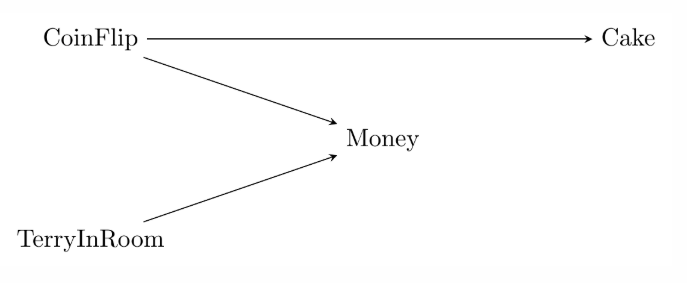

a few more things to note:
- First, keep in mind that we had to think about the causal relationships between all the variables. One variable might cause multiple things (like CoinFlip), and other variables might be caused by multiple things (like Money).
- Second, when one variable is caused by multiple things, the diagram doesn’t tell us exactly how those things come together. Keep in mind when looking at a diagram that there might be complex interactions between the causes.

One last thing to keep in mind is that all (non-trivial) variables relevant to the data generating process should be included, even if we can’t measure or see them. This pops up all the time in social science.

For example, let’s say we’re trying to figure out what variables cause people to get promotions at their job. 
- One thing that probably causes you to get a promotion is if the clients at your job really like you. 
- As researchers we probably don’t have access to data about clients liking you, and even if we did, how could we measure that accurately? 
- So “clients liking you” would be an important part of the data generating process, but it would be an *unobserved variable*.

So now let’s say that Terry doesn’t join you in the room at random, but rather decides to come in based on their mood today. We have no way of measuring their mood, so that’s unobservable.

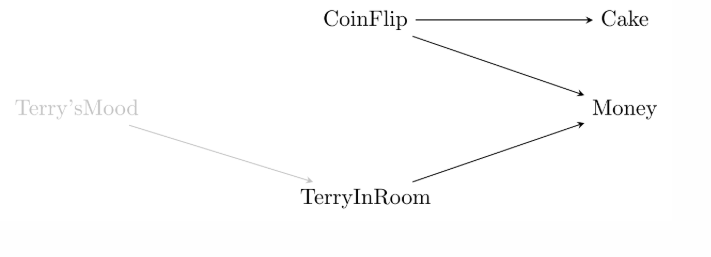

*Moderators* are variables that don't necessarily cause another variable. Instead they modify the *effect* of one variable on another. 

# Topic Overview: Differences-in-Differences
In this topic, we cover the differences-in-differences method, which helps estimate the impact of a treatment by comparing changes in a treatment group to a control group over time. By subtracting the changes in the control group from the treatment group, we can isolate the effect of the treatment, assuming the "parallel trends" assumption holds. 

### Learning Objectives 
- Implement differences-in-differences 

## 2.1 Lesson: Need for Parallel Trends
When a new policy or treatment is introduced, how can we know if it really made a difference — especially when other things might be changing at the same time? This video introduces **differences-in-differences**, a method that helps us isolate the impact of a treatment by comparing what happened with the treatment to what likely would have happened without it. You’ll explore a real-world example using two hospitals, learn the key assumption of **“parallel trends,”** and see how a simple regression can help uncover causal effects in complex situations.

Recall from the video that in differences-in-differences, we will not detect a trend and a leap, as with event studies, but we have a similar situation. There are “before” data and “after” data, and we want to know if a certain treatment caused the change. However, we don’t have access to fine-grained timing information about a prior linear trend. Instead, what we have is two groups: a treated group and a control group.

For example, suppose patients were admitted to `hospital A` and `hospital B`. 
- At `hospital A` (the treatment group), they were given a particular medication. 
- At `hospital B` (the control group), they were not. 

We want to know whether the medication helped the patients. The problem is that some part of the benefit at hospital A could come from simply being admitted to a hospital. 

The patients rested in hospital beds, for instance. We don’t want to count that benefit; we only want to count the benefit that comes from taking the medication. 

But hospital B gives us a way to manage this problem. If there’s a benefit from being admitted to a hospital, then this same benefit would apply to hospital B. 

So, in essence, we must subtract the benefit at `hospital B` (`bed rest alone`) from the benefit at `hospital A` (`bed rest plus medication`) in order to find the benefit due to the medication. 

That is:
$$ \text{benefit (bed rest + medication) - benefit (bed rest alone) = benefit(medication)}$$

The control group (B) then serves to remove the effect of bed rest. 

We assume that without the treatment, whatever happened to the control group is what would have happened to the treatment group. This is called the **“parallel trends”** assumption; *whatever happens to the treatment group beyond the change in the control group is due to the treatment*. 

The experiment can be modeled with the following linear regression:
$$ [Y \; = \; \alpha_{group} + \alpha_{time} + \beta_1 \cdot \text{treated} + \epsilon]$$

Where:
- $\alpha_{group}$ is the base value for treatment or control. 
- $\alpha_{time}$ is the amount added by the transitionn from "before" time to the "after" time. 
- $\text{treated}$ is $1$ in only one case (the treatement group during the "after" time), and $0$ otherwise. 
- $\epsilon$ is the error term, representing any noise. 

There are 4 $\text{group} \times \text{time}$ pairs:
- (hospital_a, before/untreated)
- (hospital_a, after/treated)
- (hospital_b, before/untreated)
- (hospital_b, before/untreated)

Three of these are untreated ((hospital_a, before), (hospital_b, before), (hospital_b, before)), the 4th (hospital_a, after) is treated. 

We really want to compare (hospital_a , after, treated) to (hospital_a, after, untreated), but we don't ahve access to the counterfactual. **differences-in-differences** helps us to estimate it. 

Our method is going to involve finding the two after minus before effects and then subtracting the B difference from the A difference. Hence the name “differences-in-differences.” To do this regression, we can’t have just four data points (one for each group and time value pair). We need multiple data points per bin. But if we have that, then we can estimate the value of the treatment, which is $\beta_1$.

**Knowledge Check: Event Studies and Differences-in-Differences**
1. The purpose of the control group in differences-in-differences is to:
- Find out what might ahve happened in the absence of the treatement
- In general, the purpose of any control group is to guess what would have happened in the absence of the treatment. 
2. We believe a stock would be unlikely to experience effects of an event long after the event ends because of:
- The efficient market hypothesis
- The efficient market hypothesis says that all predictable effects of an event are priced in shortly after the event happens. 
3. An event study might be able to detect:
- Both a leap in value and a leap in a linear trend after an event.
- In the text, there is an "After" coefficient for the leap in value and a $(t - t_0) \times \text{After}$ coefficient for the leap in the linear trend. 

### Reading quiz work
Differences In Differences DID, works by comparing the change in outcomes with treatment to the change that would have happened without it. It's all about isolating the true
effect of an intervention. 

For example, suppose Hospital A starts giving patients the new medication on January 10th, while Hospital B continues with the old treatment. If outcomes improve at
Hospital A afterward, we might attribute that change to the medication. But here's the catch, maybe something else changed around the same time, like a new health regulation or a shift in bacterial
strains that affected both hospitals. 

If so, we can't credit the medication alone. That's why we use Hospital B as a comparison group. The key assumption is that both hospitals would have followed parallel trends over time if the treatment hadn't been introduced. By comparing the difference in differences, we aim to isolate the treatment effect from other simultaneous changes. In this diagram, patient outcomes are improving over time at both hospitals. However, Hospital A shows a much larger improvement after the treatment begins. The key idea behind differences in differences is to compare this change at Hospital A to the change at Hospital B, which didn't receive the treatment. 

We assume that without the treatment, Hospital A would have followed the same trend as Hospital B. In this case, both hospitals improve, but Hospital A improves much more, suggesting a treatment effect. An event study alone might not catch this. Even if we detect a jump at Hospital A,
we might see a similar jump at Hospital B, making it unclear whether the improvement was due to the treatment or something else affecting both hospitals. 

Differences in differences helps us control for that shared change by using Hospital B as a counterfactual. 

Differences in differences can be implemented using a simple linear regression model. 

$Y =  \beta_0 + beta_1 \times \text{TreatedGroup} + \beta_2 \times \text{AfterTreatment} +  \beta_3 \times \text{TreatedGroup} \times \text{AfterTreatment} + \epsilon$ 

Here the betas are constant coefficients and epsilon represents random noise. 

In our example, we have two hospitals: 

- Hospital A the treated group, 
- Hospital B the control. 

We also have two time periods: 
- before January 10th,  
- after January 10th, 

When Hospital A started the new treatment. The interaction term treated group times after treatment = 1 only when the data point comes from Hospital A, after the treatment date and 0 otherwise. 

At its core, this model is just comparing four groups 
- $\beta_0$ (Hospital B before treatment) 
- $\beta_0 + \beta_1$ (Hospital A before treatment), 
- $\beta_0 + \beta_2$ (Hospital B after treatment), 
- $\beta_0 + \beta_1 + \beta_2 + \beta_3$ (Hospital A after treatment). 

The treatment effect we're Interested in is $beta_3$. 

It captures the difference in outcome changes between the two hospitals, that is how much more Hospital A improved compared to Hospital B after the treatment. 

This is the essence of differences in differences. We're comparing one difference, Hospital A, before versus after, to another difference, Hospital B, before versus after to isolate the true effect of the treatment.


A researcher wants to estimate the effect of a `new job training program` on employee `wages`. 

She collects data on two groups: one that participated in the program (treatment group) and one that did not (control group), both before and after the program was implemented. 

Which of the following best describes the differences-in-differences approach the researcher should use? 